In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
# Importing dataset
df = pd.read_csv("D:/Imarticus/Paper1/bank.csv", sep = ";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analysis

In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

###  Primary analysis of several categorical features

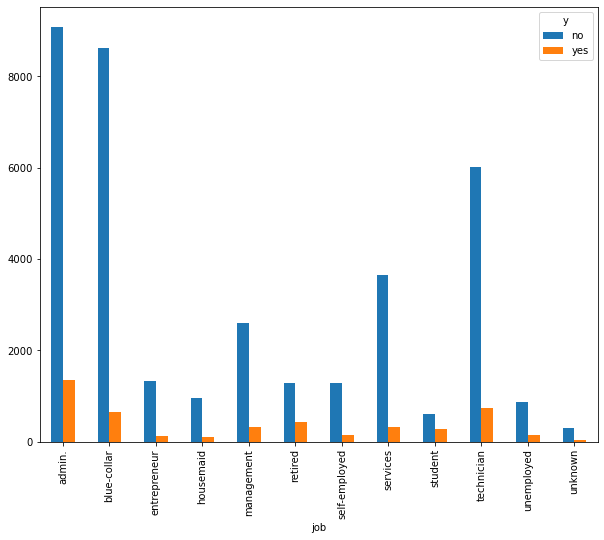

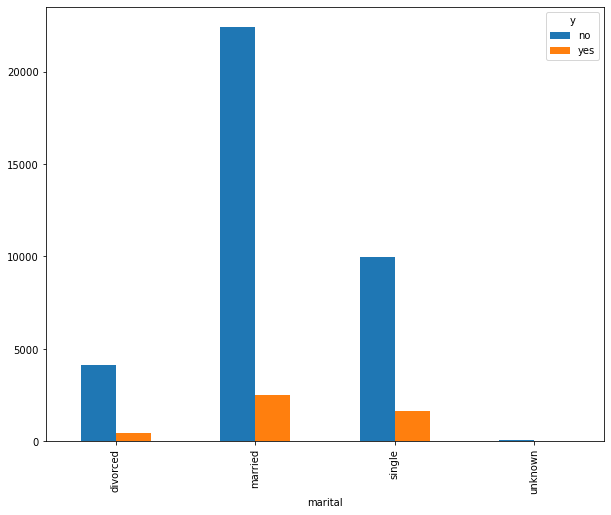

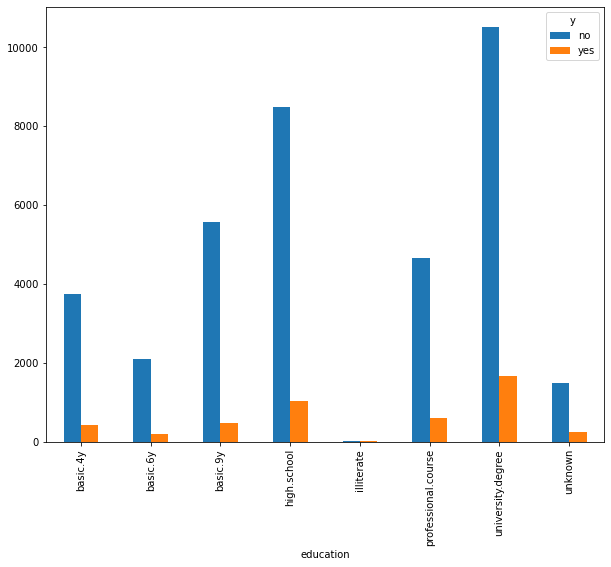

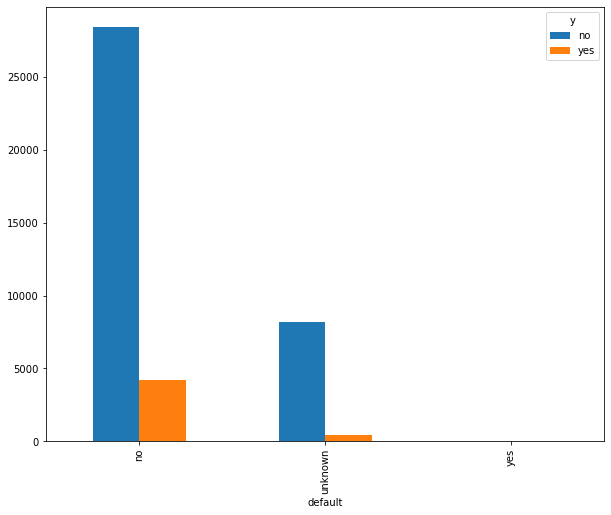

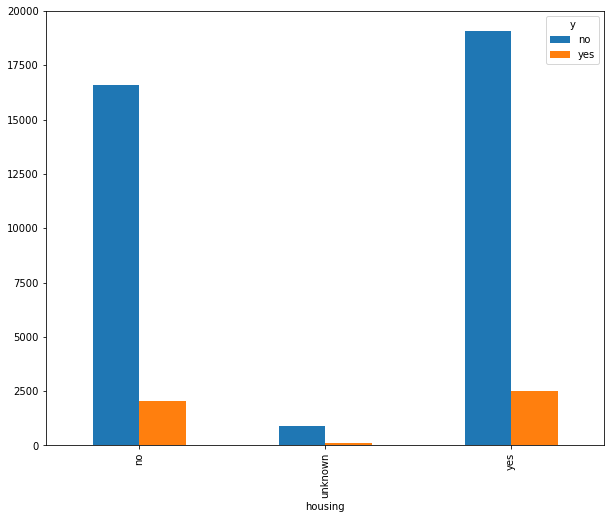

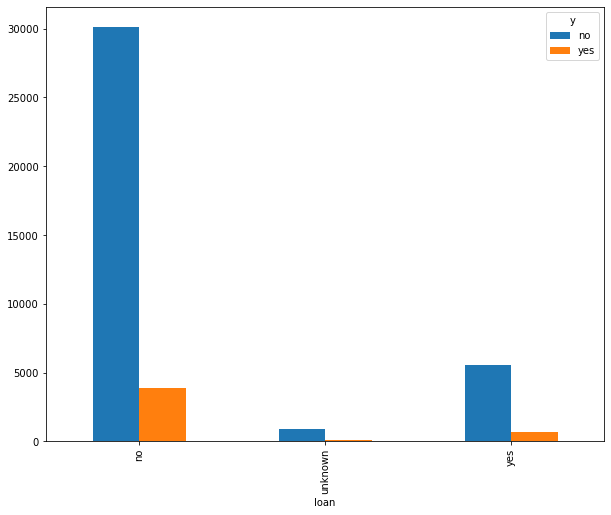

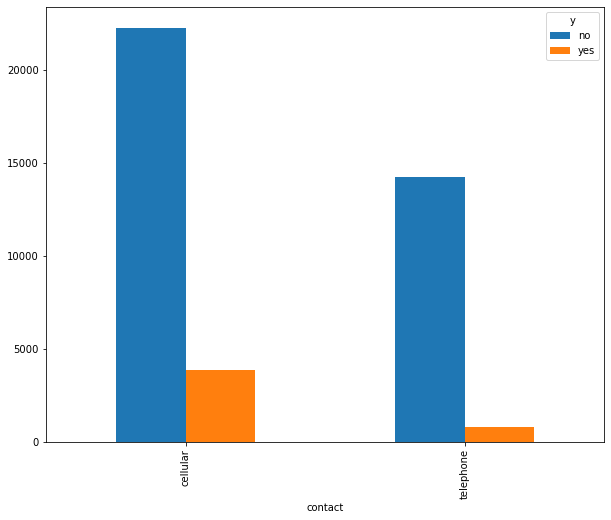

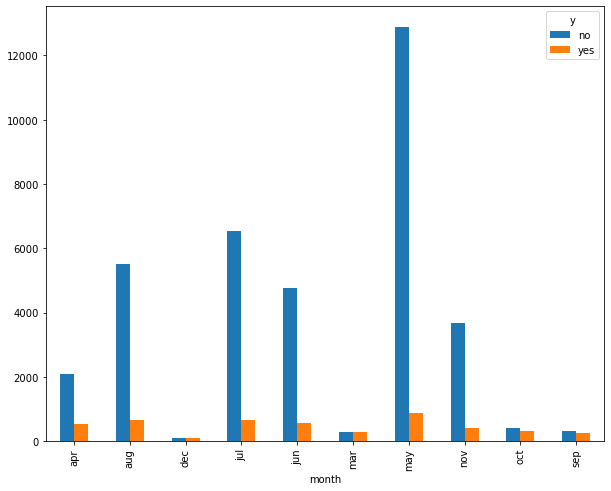

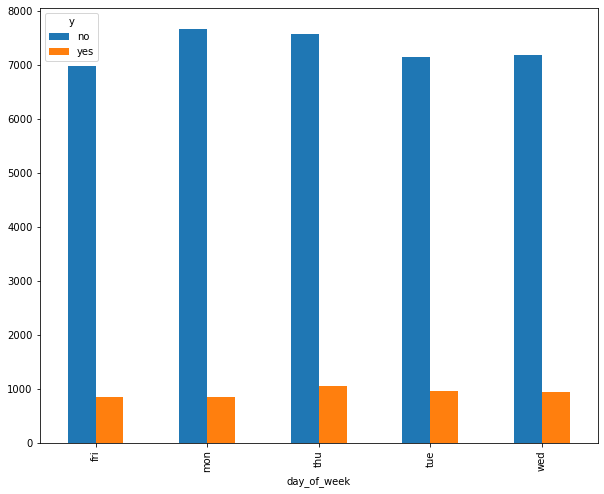

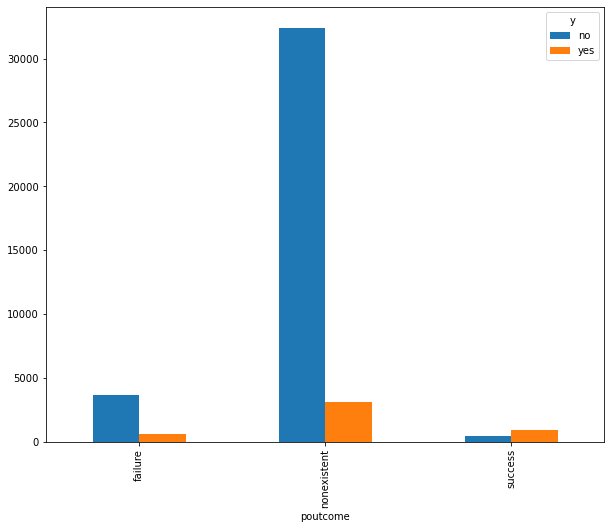

In [6]:
for i in df.columns:
    if i != "y" and df[i].dtype == "O" :
        CrosstabResult = pd.crosstab(index = df[i],columns=df['y'])
        CrosstabResult.plot.bar(figsize=(10,8))      

### From the following plots we could observe that:
###     1. Married people have the most number of subscriptions for term deposit in terms of marital status.
###     2. People who are illliterate have the least number of subscriptions for term deposit in terms of education.
###     3. People who have aquired an university degree the most number of subscriptions for term deposit in terms of education.

### Missing Value Analysis

In [7]:
df.isnull().sum()
# No missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Label Encoding Required Columns

In [8]:
labelencoder = LabelEncoder()

In [9]:
a = ["default", "housing", "loan", "contact",]
for i in a:
    df[i] = labelencoder.fit_transform(df[i])

In [10]:
# one hot encoding remaining columns
df = pd.get_dummies(df, columns=["job", "marital", "education", 
                                "month", "day_of_week", "poutcome", 
                                "y"], drop_first = True)

In [11]:
X = df.drop("y_yes",axis=1)
y = df["y_yes"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

### Selecting Important Features using Random Forest

In [13]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [14]:
sel.get_support()

array([ True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [15]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)
len(selected_feat)

Index(['age', 'housing', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_success'],
      dtype='object')


11

In [16]:
# pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

In [17]:
X = df[['age', 'housing', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_success']]
y = df["y_yes"]

### Balancing dataset using SMOTE

In [18]:
y.value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

In [19]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

In [20]:
y_res.value_counts()

0    36548
1    36548
Name: y_yes, dtype: int64

### Standardize data

In [21]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_res)

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.25, random_state=0)

### Logistic Regression

In [23]:
log_model = LogisticRegression()  
log_model.fit(X_train, y_train)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))

0.8494582466892853
0.8510452008317828


In [25]:
y_pred_log = log_model.predict(X_test)
print("Logistic Regression : ")
print( metrics.classification_report(y_test, y_pred_log))

Logistic Regression : 
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      9017
           1       0.85      0.86      0.85      9257

    accuracy                           0.85     18274
   macro avg       0.85      0.85      0.85     18274
weighted avg       0.85      0.85      0.85     18274



### Ada Boost

In [26]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train.values.ravel())

AdaBoostClassifier()

In [27]:
print(ada_model.score(X_train, y_train))
print(ada_model.score(X_test, y_test))

0.8952063040385246
0.8954799168217139


In [28]:
y_pred_ada = ada_model.predict(X_test)
print("Ada Boost : ")
print(metrics.classification_report(y_test, y_pred_ada))

Ada Boost : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9017
           1       0.89      0.90      0.90      9257

    accuracy                           0.90     18274
   macro avg       0.90      0.90      0.90     18274
weighted avg       0.90      0.90      0.90     18274



### Naive Bayes

In [29]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train.values.ravel())

GaussianNB()

In [30]:
print(bayes_model.score(X_train, y_train))
print(bayes_model.score(X_test, y_test))

0.8014483236656816
0.7960490314107476


In [31]:
y_pred_bayes = bayes_model.predict(X_test)
print("Naive Bayes : ")
print(metrics.classification_report(y_test, y_pred_bayes))

Naive Bayes : 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      9017
           1       0.86      0.72      0.78      9257

    accuracy                           0.80     18274
   macro avg       0.80      0.80      0.80     18274
weighted avg       0.80      0.80      0.79     18274



### KNN

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [33]:
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.9341322826602458
0.9137025281821166


In [34]:
y_pred_knn = knn_model.predict(X_test)
print("KNN : ")
print(metrics.classification_report(y_test, y_pred_knn))

KNN : 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      9017
           1       0.88      0.97      0.92      9257

    accuracy                           0.91     18274
   macro avg       0.92      0.91      0.91     18274
weighted avg       0.92      0.91      0.91     18274



### SVM

In [35]:
svm_model = svm.SVC(C = 18,kernel = 'poly')
svm_model.fit(X_train, y_train.values.ravel())

SVC(C=18, kernel='poly')

In [36]:
print(svm_model.score(X_train, y_train))
print(svm_model.score(X_test, y_test))

0.848856298566269
0.8510452008317828


In [37]:
y_pred_svm = svm_model.predict(X_test)
print("SVM : ")
print(metrics.classification_report(y_test, y_pred_svm))

SVM : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      9017
           1       0.84      0.87      0.86      9257

    accuracy                           0.85     18274
   macro avg       0.85      0.85      0.85     18274
weighted avg       0.85      0.85      0.85     18274



### Performance Evaluation

### Our aim is to predict if the client will subscribe to term deposit or not hence we require our False Negative rate to be as low as possible. So we consider the model with the highest Recall score.

In [38]:
print("Logistic Regression : ", recall_score(y_test, y_pred_log))
print("Ada Boost : ", recall_score(y_test, y_pred_ada))
print("Naive Bayes : ", recall_score(y_test, y_pred_bayes))
print("KNN : ", recall_score(y_test, y_pred_knn))
print("SVM : ", recall_score(y_test, y_pred_svm))

Logistic Regression :  0.8575132332289078
Ada Boost :  0.9035324619207087
Naive Bayes :  0.7190234417197796
KNN :  0.9672680133952685
SVM :  0.8737171869936264


### Therefore we can conclude that KNN is the best model for this dataset.